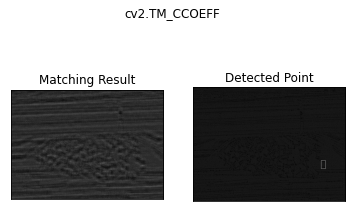

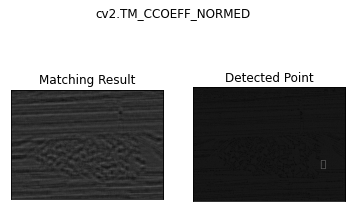

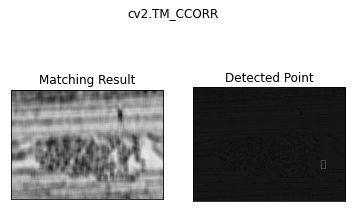

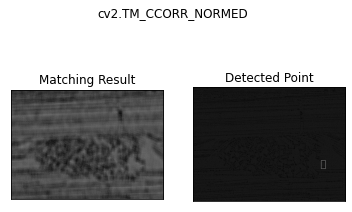

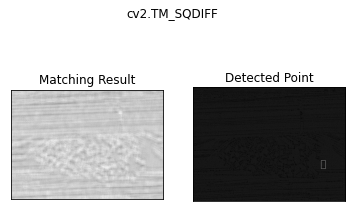

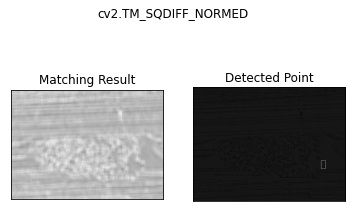

In [4]:
# from re import template
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('lbp_img.png',0)

def crop(image, mask_pts):
    #imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    mask = np.zeros(image.shape[:2], dtype="uint8")
    pts = np.array(mask_pts)
    color = 255
    cv2.fillPoly(mask, [pts], color)
    masked = cv2.bitwise_and(image, image, mask=mask)
    rect = cv2.boundingRect(pts)
    x,y,w,h = rect
    croped = image[y:y+h, x:x+w].copy()
    print(croped.shape , image.shape)
    return croped, image

def new_img(img,result,thresh):
    (y_points, x_points) = np.where(result >= thresh)
    loc = zip(x_points, y_points)
    # print(loc[0])
    result1 = img.copy()
    W, H = img.shape
    cnt1, cnt2 = 0,0
    for x in range (W):
        for y in range (H):
            cnt1 += 1
            if (x,y) not in loc:
                result1[x][y] = 0
            else: cnt2 += 1
            # print(x,y)
    print(cnt1,cnt2)
    return result1


img2 = img.copy()

# mask_pts = [[310,630], [1810,630], [1810,1280], [300,1280]]

# croped, original = crop(img2, mask_pts)

# mask_pts1 = [[1390,350], [1445,350], [1445,455], [1390,455]]

# # template, original1 = crop(croped, mask_pts1)
# print("shape:", croped.shape)
# plt.imshow( template)

template = cv2.imread('lbp_template.png',0)
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    cv2.imwrite("./out1/"+meth+"_template_lbp_match.png", res)
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    cv2.imwrite("./out2/"+meth+"_out_lbp_match.png", img)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()